In [93]:
import numpy as np
import molecCollPackage as molec
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import random
import math

To do: just compute both lifeties for Cs and Li (and possibly other atom species) in one for loop.

# For Lithium

In [2]:
# Use run_tests to only run simulations when making an update on the data (to avoid having to wait every time)
run_tests = 0
Tlist_Li = [25, 50, 100, 150, 250, 300, 400, 500, 600, 650, 750, 900, 1000]
if run_tests:
    tlist_Li = []
    for T in Tlist_Li:
        tlist_Li = np.append(tlist_Li, molec.run_collision(T, atom="Li", rinit1=50)[0]) 
else:
    # Precomputed values (useful when we just want to plot, for ex)
    tlist_Li = np.array([  1.16033674e-04,   1.00020688e-04,   7.09699392e-05,
         5.72307008e-05,   4.44590144e-05,   4.09758272e-05,
         3.47834944e-05,   3.14454400e-05,   2.50112192e-05,
         2.30277376e-05,   2.03427808e-05,   1.77787680e-05,
         1.65693280e-05])

In [3]:
# Fit power law

fitfunc = lambda p, x: p[1]*x**(p[0]) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [0.1, 1] # Initial guess for the parameters
p1_Li, success = sp.optimize.leastsq(errfunc, p0[:], args=(Tlist_Li, tlist_Li))

print("Li computed lifetimes follow a power-law dependence with exponent %s" %(p1_Li))

Li computed lifetimes follow a power-law dependence with exponent [-0.468187    0.00056283]


# For Cesium

Be careful to change the max number of steps for heavier atoms. Otherwise we get a ~constant lifetime for the colder temperatures.

In [4]:
# Use run_tests to only run simulations when making an update on the data (to avoid having to wait every time)
run_tests = 0
Tlist_Cs = [25, 50, 100, 200, 250, 300, 400, 500, 600, 650, 750, 900, 1000]
if run_tests:
    tlist_Cs = []
    for T in Tlist_Cs:
        tlist_Cs = np.append(tlist_Cs, molec.run_collision(T, t=(0, 30000), atom="Cs", rinit1=50)[0]) 
else:
    # Precomputed values (useful when we just want to plot, for ex)
    tlist_Cs = np.array([  6.14806730e-04,   4.37623770e-04,   3.07536403e-04,
         2.11313357e-04,   1.95397126e-04,   1.77255526e-04,
         1.55026019e-04,   1.39206544e-04,   1.25346362e-04,
         1.21185888e-04,   1.09938096e-04,   1.03334554e-04,
         9.73357312e-05])

In [5]:
# Fit power law

fitfunc = lambda p, x: p[1]*x**(p[0]) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [0.1, 1] # Initial guess for the parameters
p1_Cs, success = sp.optimize.leastsq(errfunc, p0[:], args=(Tlist_Cs, tlist_Cs))

print("Cs computed lifetimes follow a power-law dependence with exponent %s" %(p1_Cs))

Cs computed lifetimes follow a power-law dependence with exponent [-0.50089214  0.00308719]


# Plots...

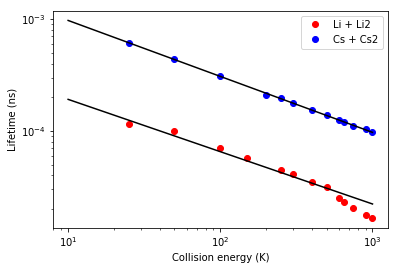

In [15]:
# Plot lifetime and fitted power law
fig = plt.figure()
Tpowerlaw = np.linspace(10,1000,20)
plt.loglog(Tlist_Li,tlist_Li,'ro', label='Li + Li2')
plt.loglog(Tlist_Cs,tlist_Cs,'bo', label='Cs + Cs2')
plt.loglog(Tpowerlaw, fitfunc(p1_Li, Tpowerlaw),'k')
plt.loglog(Tpowerlaw, fitfunc(p1_Cs, Tpowerlaw),'k')
plt.ylabel("Lifetime (ns)")
plt.xlabel("Collision energy (K)")
plt.legend()
plt.show()
pp = PdfPages('lifetime.pdf')
pp.savefig(fig)
pp.close()

# Fractional survival

## Lithium first

In [114]:
T = 100
N_time = 20 # how many time divisions
N = 100 # how many trials per time division
time_x = np.linspace (100, 25000, N_time)
number_remaining_Li = np.zeros(N_time)
rand_theta = 0

In [115]:
for i in range(N_time):
    for j in range(N):
        rand_theta = random.uniform(0, 1)*np.pi/2
        dwell_time = molec.run_collision(T=T, theta=rand_theta, b=0, t=(0, time_x[i]), dt = 1, rinit1=150.0, d_molec = 8.78, max_step=0.1, atom="Li")[0]
        if math.isclose(dwell_time, time_x[i]*2.41888*10**(-8), rel_tol=0.01): # Convert from time a.u.
            number_remaining_Li[i] = number_remaining_Li[i] + 1
    if(i%2==0):
        print("Finished %s time divisions out of %s" %(i+1, N_time))

Finished 1 time divisions out of 20
Finished 3 time divisions out of 20
Finished 5 time divisions out of 20
Finished 7 time divisions out of 20
Finished 9 time divisions out of 20
Finished 11 time divisions out of 20
Finished 13 time divisions out of 20
Finished 15 time divisions out of 20
Finished 17 time divisions out of 20
Finished 19 time divisions out of 20


In [116]:
# Get fraction
frac_remain_Li = np.divide(number_remaining_Li, N)
time_x_ns = np.multiply(time_x, 2.41888*10**(-8))

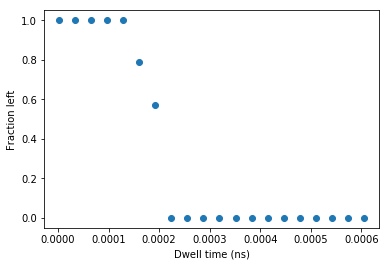

In [123]:
fig = plt.figure()
plt.plot(time_x_ns, frac_remain_Li, marker = 'o', linestyle='None')
plt.xlabel("Dwell time (ns)")
plt.ylabel("Fraction left")
plt.show()
pp = PdfPages('fraction_left.pdf')
pp.savefig(fig)
pp.close()